In [128]:
import os
import time
import scipy.io
import numpy as np
import cv2
import matplotlib.pyplot as plt

'''
The main purpose of this notebook is to do some EDA on the images.
I wanted to see what I was dealing with and how their corresponding masks
looked like. This allowed me to make the decision to use the red channel
of the images. It also allowed me to verify that the masks matched up with
the images.
'''

In [129]:
def obtain_mask(file_name):
    mask_save = 'data/masks/'
    try:
        mat = scipy.io.loadmat(file_name)
        map = mat['inst_map']
        map = cv2.convertScaleAbs(map)
        #binary_image = map
        _, binary_image = cv2.threshold(map, 1, 255, cv2.THRESH_BINARY)

        '''f = file_name.split('/')
        f = f[2].split('.')
        path = mask_save + f[0] + '.png'
        print(path)
        cv2.imwrite(path, binary_image)'''

        return binary_image
    except:
        raise Exception("Could not load given file")


def load_data(directory, img=False, num_samples=None):
    files = sorted(os.listdir(directory))

    if num_samples is None:
        num_samples = len(files)

    data = []
    count = 0
    for fn in files:
        if count < 9000:
            count += 1
            continue

        if num_samples == 0:
            break

        path = os.path.join(directory, fn)

        if not fn.startswith('.'):
            num_samples -= 1
            print(f"Processing file: {path}")
            if img:
                data.append(cv2.imread(path))
            else:
                data.append(obtain_mask(path))

    return data

In [130]:
# Data directories
mask_dir1 = 'data/mask_0_5000/'
mask_dir2 = 'data/mask_5k_10k/'
mask_dir3 = 'data/mask_10k_15k/'
mask_dir4 = 'data/mask_15k_20k/'

image_dir1 = 'data/img_0_5000/'
image_dir2 = 'data/img_5k_10k/'
image_dir3 = 'data/img_10k_15k/'
image_dir4 = 'data/img_15k_20k/'

In [131]:
imgs = load_data(image_dir1, img=True, num_samples=5)
masks = load_data(mask_dir1, img=False, num_samples=5)

Processing file: data/img_0_5000/004000.png
Processing file: data/img_0_5000/004001.png
Processing file: data/img_0_5000/004002.png
Processing file: data/img_0_5000/004003.png
Processing file: data/img_0_5000/004004.png
Processing file: data/mask_0_5000/004000.mat
Processing file: data/mask_0_5000/004001.mat
Processing file: data/mask_0_5000/004002.mat
Processing file: data/mask_0_5000/004003.mat
Processing file: data/mask_0_5000/004004.mat


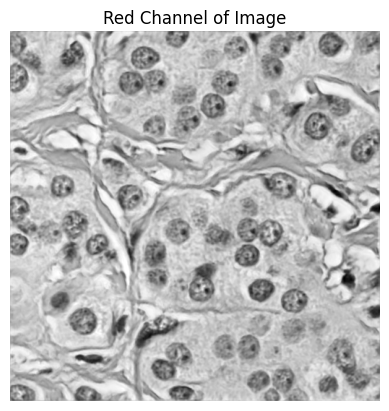

True

In [132]:
# plt.imshow(cv2.cvtColor(red, cv2.COLOR_BGR2RGB))
img_num = 4
b, g, r = cv2.split(imgs[img_num])

plt.imshow(r, cmap='gray')
plt.title('Red Channel of Image')
plt.axis('off')
plt.show()

cv2.imwrite('example_red.png', r)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


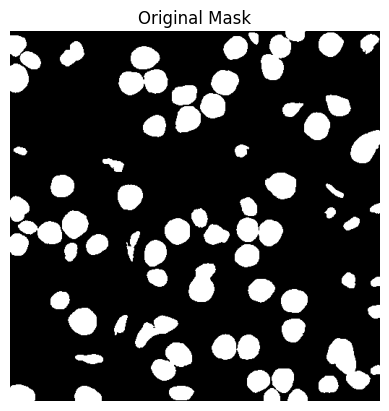

True

In [133]:
print(masks[img_num])

mask = masks[img_num]

plt.imshow(mask, cmap='gray')
plt.title('Original Mask')
plt.axis('off')
plt.show()

cv2.imwrite('mask_4004.png', mask)